In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\bwink\Downloads\Achievement 4'

In [3]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [4]:
df.head()


,user_id,First,Last,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Least busy days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer


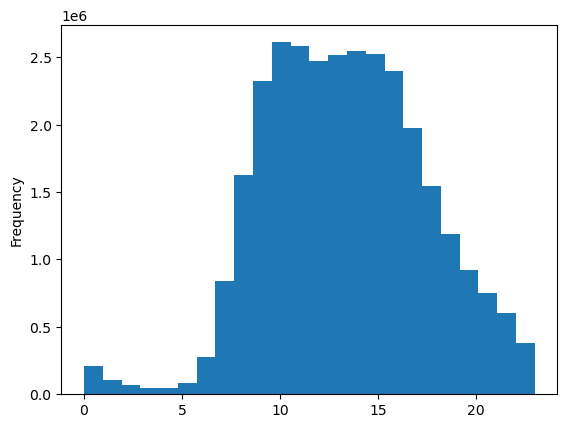

In [5]:
hist_orders_hour_of_day = df['order_hour_of_day'].plot.hist(bins = 24)

# Peak hours are between 9AM and 4PM

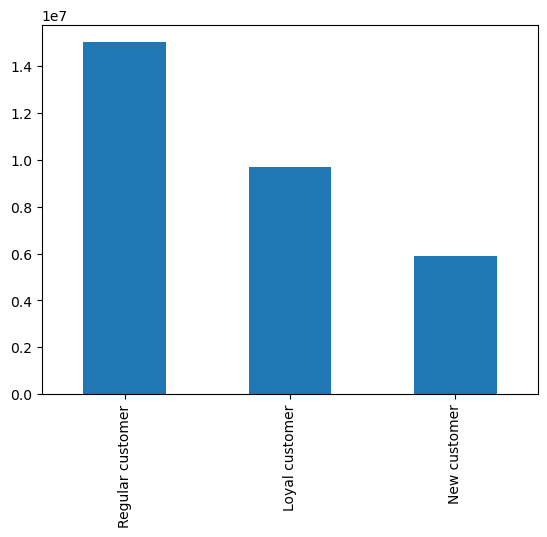

In [6]:
loyalty_flag_bar = df['loyalty_flag'].value_counts().plot.bar()

# The majority of our customers are "Regular"

In [8]:
np.random.seed(4)
temp = np.random.rand(len(df)) <= 0.7

In [9]:
temp

array([False,  True, False, ..., False,  True,  True])

In [10]:
big = df[temp]

In [11]:
small = df[~temp]

In [12]:
len(df)

30629741

In [13]:
len(big) + len(small)

30629741

In [14]:
df_line = small[['order_hour_of_day','prices']]

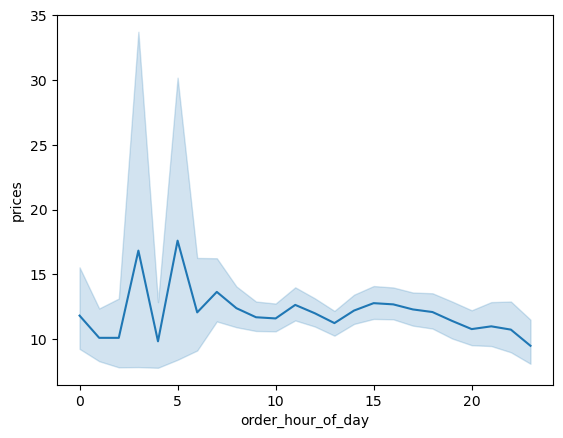

In [15]:
df_line_visual = sns.lineplot(data = df_line, x = 'order_hour_of_day',y = 'prices')

# No noticeable correlation between price and hour of day

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30629741 entries, 0 to 30629740
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   First                   object 
 2   Last                    object 
 3   Gender                  object 
 4   State                   object 
 5   Age                     int64  
 6   date_joined             object 
 7   number_of_dependants    int64  
 8   marital_status          object 
 9   income                  int64  
 10  product_id              int64  
 11  product_name            object 
 12  aisle_id                int64  
 13  department_id           int64  
 14  prices                  float64
 15  order_id                int64  
 16  eval_set                object 
 17  order_number            int64  
 18  order_day_of_the_week   int64  
 19  order_hour_of_day       int64  
 20  days_since_prior_order  float64
 21  add_to_cart_order       int64

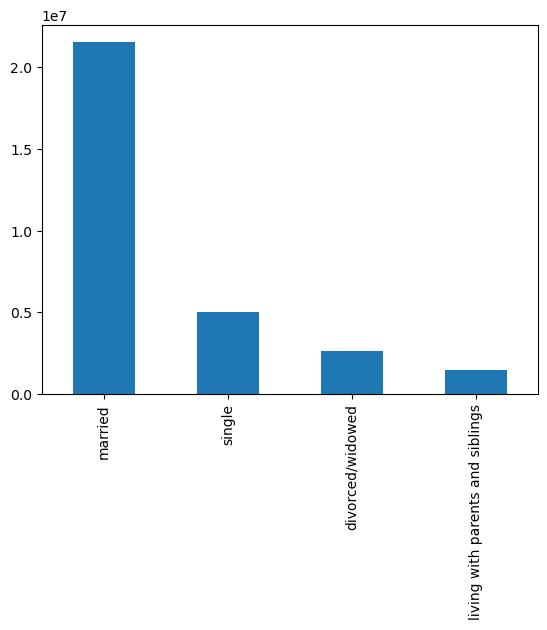

In [17]:
marriage_bar = df['marital_status'].value_counts().plot.bar()

# most instacart customers are married

In [19]:
#establish age groups to make certain charts easier
df.loc[df['Age'] >= 90, 'age_group'] = '90+'

In [21]:
df.loc[(df['Age'] <= 89) & (df['Age'] >= 80), 'age_group'] = '80-89'

In [22]:
df.loc[(df['Age'] <= 79) & (df['Age'] >= 70), 'age_group'] = '70-79'

In [23]:
df.loc[(df['Age'] <= 69) & (df['Age'] >= 60), 'age_group'] = '60-69'

In [24]:
df.loc[(df['Age'] <= 59) & (df['Age'] >= 50), 'age_group'] = '50-59'

In [25]:
df.loc[(df['Age'] <= 49) & (df['Age'] >= 40), 'age_group'] = '40-49'

In [26]:
df.loc[(df['Age'] <= 39) & (df['Age'] >= 30), 'age_group'] = '30-39'

In [27]:
df.loc[(df['Age'] <= 29) & (df['Age'] >= 20), 'age_group'] = '20-29'

In [28]:
df.loc[(df['Age'] <= 19) & (df['Age'] >= 10), 'age_group'] = '10-19'

In [29]:
df['age_group'].value_counts(dropna = False)

40-49    4815900
50-59    4804320
30-39    4795448
20-29    4785372
70-79    4784783
60-69    4717936
10-19     964840
80-89     961142
Name: age_group, dtype: int64

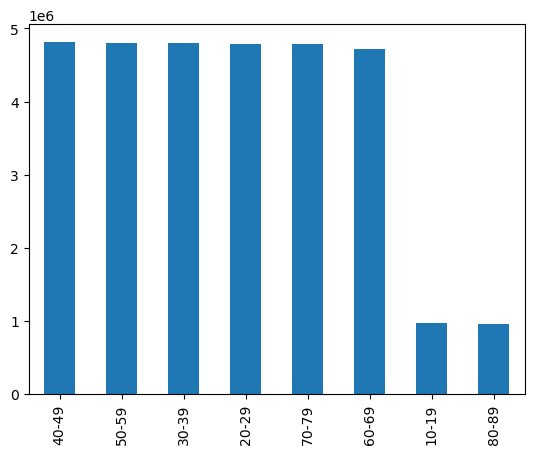

In [30]:
age_group_bar = df['age_group'].value_counts().plot.bar()

# customers in the 10-19 and 80-89 age ranges are less populous

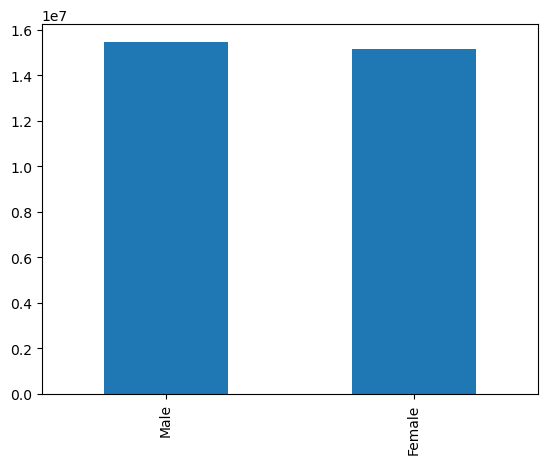

In [33]:
gender_bar = df['Gender'].value_counts().plot.bar()

# customer base is majority male by a slim margin

In [34]:
df_line_2 = small[['number_of_dependants','Age']]

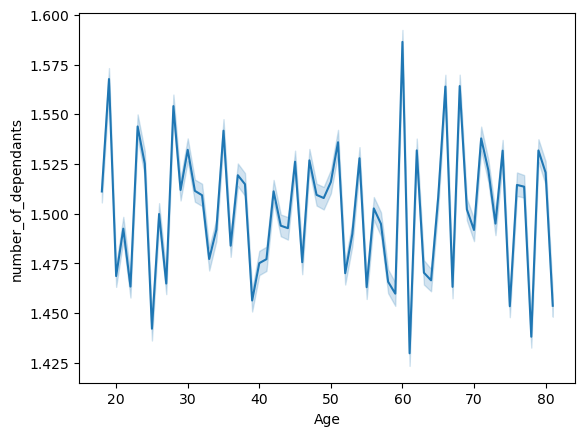

In [35]:
age_dep_line = sns.lineplot(data = df_line_2, x = 'Age',y = 'number_of_dependants')

# No clear correlation between age and number of dependants

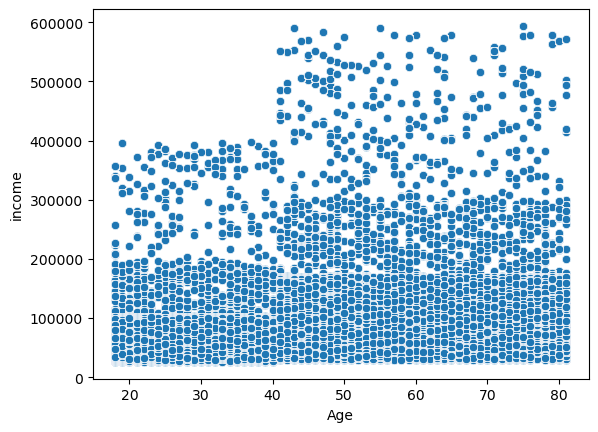

In [5]:
age_group_income_scatter = sns.scatterplot(x = 'Age', y = 'income',data = df)

# once a customer enters their 40's they typically have a much greater income level

In [37]:
hist_orders_hour_of_day.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_orders_hour_of_day.png'))

In [38]:
loyalty_flag_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_flag_bar.png'))

In [39]:
df_line_visual.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_hour_line.png'))

In [40]:
marriage_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'marriage_bar.png'))

In [41]:
age_group_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_group_bar.png'))

In [42]:
gender_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'gender_bar.png'))

In [43]:
age_dep_line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_dep_line.png'))

In [6]:
age_group_income_scatter.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_group_income_scatter.png'))